In [1]:
# Our inital imports to make the font size appropriate and make jupyter notebook as wide as the webpage

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.container { font-size:16px !important; }</style>"))

In [2]:
# Import appropriate packages and set up nice plotting:

import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=False)

# Temporal coherence and quasimonochromatic wave packets 

#### We proceed similarly as in the previous notebook, except that now the wavelengths are not the same. We will create a superposition of two harmonic plane waves with slightly different wavelengths. 

In [3]:
# Wavelength and period in the above given units (don't worry about units so much)
llambda1 = 1.0
T1 = 1.0
k1 = 2.*np.pi / llambda1
omega1 = 2.*np.pi / T1
llambda2 = 1.01
k2 = 2.*np.pi / llambda2
T2 = 1.0 / 1.01
omega2 = 2.*np.pi / T2

r = np.linspace(0,200,4001)
t = np.linspace(0,200,4001)

#### Now let's calculate the irradiance of the wave, just to remind ourselves how what works. To make that easier, we can make a function:

In [4]:
def calculate_irradiance(E,t):
    t_step = t[1]-t[0]
    t_total = t[-1] - t[0]
    irradiance = np.sum(E**2.0) * t_step / t_total
    return irradiance

In [5]:
# Let's make two harmonic plane waves: 

E1 = np.cos(k1*r[:,None]-omega1*t[None,:])
E2 = np.cos(k2*r[:,None]-omega2*t[None,:])
E = E1 + E2 

### Let's plot these two waves and their sum. For the moment, just for a first few wavelengths.

Text(0, 0.5, 'E(r)')

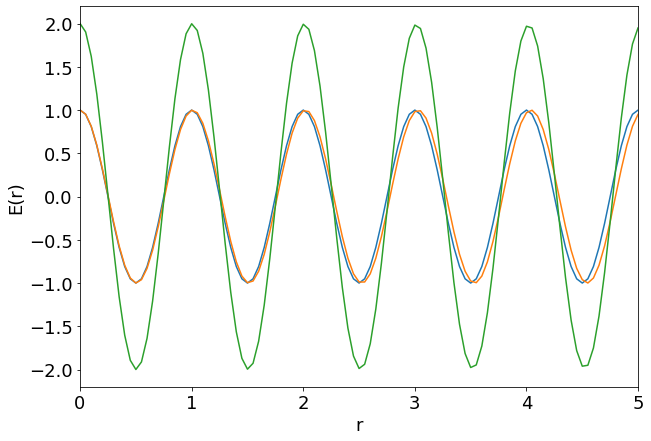

In [6]:
plt.figure(figsize=[10,7])
plt.plot(r,E1[:,0],label='E1')
plt.plot(r,E2[:,0],label='E2')
plt.plot(r,E[:,0], label='E1+E2')
plt.xlim([0,5])
plt.xlabel("r")
plt.ylabel("E(r)")

#### These waves look like they are exactly in phase. Does it look the same when we plot it in time? 

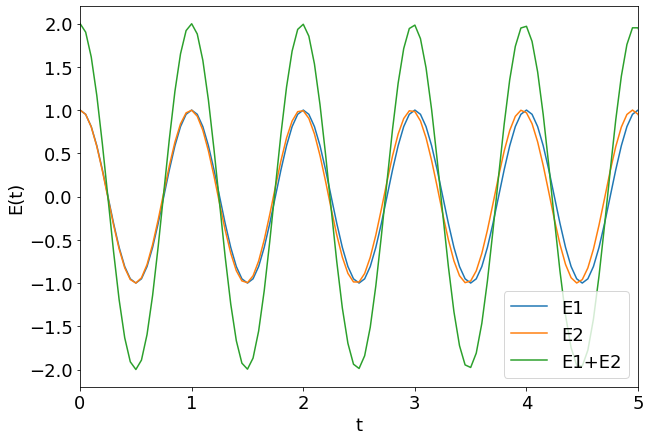

In [7]:
plt.figure(figsize=[10,7])
plt.plot(t,E1[0,:],label='E1')
plt.plot(t,E2[0,:],label='E2')
plt.plot(t,E[0,:], label='E1+E2')
plt.xlim([0,5])
plt.xlabel("t")
plt.ylabel("E(t)")
plt.legend()

#### Unsurprisingly, yes! 

#### Can you guess what will be the irradiance if we measured it, averaged over the 5 periods? 

. 

.

.

.

.


In [8]:
I1 = calculate_irradiance(E1[0,:200],t[:200])
I2 = calculate_irradiance(E2[0,:200],t[:200])
I = calculate_irradiance(E[0,:200],t[:200])
print ("Irradiance of first wave is: ", I1)
print ("Irradiance of the second wave is: ", I2)
print ("Irradiance of the superposition is: ", I)

Irradiance of first wave is:  0.5025125628140704
Irradiance of the second wave is:  0.5070189001681753
Irradiance of the superposition is:  1.9552017304188147


#### Can any1 guess what will happen if I average over much larger periods of time? 

In [9]:
I1 = calculate_irradiance(E1[0,:],t[:])
I2 = calculate_irradiance(E2[0,:],t[:])
I = calculate_irradiance(E[0,:],t[:])
print ("Irradiance of first wave is: ", I1)
print ("Irradiance of the second wave is: ", I2)
print ("Irradiance of the superposition is: ", I)

Irradiance of first wave is:  0.5002500000000001
Irradiance of the second wave is:  0.50025
Irradiance of the superposition is:  1.0009999999999948


### Why is this so? 

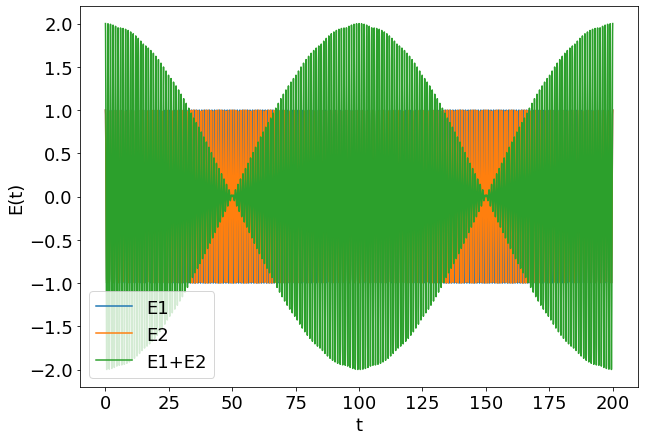

In [10]:
plt.figure(figsize=[10,7])
plt.plot(t,E1[0,:],label='E1')
plt.plot(t,E2[0,:],label='E2')
plt.plot(t,E[0,:], label='E1+E2')
#plt.xlim([0,5])
plt.xlabel("t")
plt.ylabel("E(t)")
plt.legend()

### ------------------------------------------------------

### Applying Fourier transform to all this! (If we have time)

Sadly, we do not have analytical Fourier transform in python, we have numerical one though, it is called FFT (Fast Fourier Transform):

In [32]:
# Define the function that calculates the wave packet, we will need this for later :)

def pseudo_harmonic_wave(r,t,omega,k):
    E = np.cos(k*r[:,None] - omega*t[None,:]) # calculate it everywhere for start:
    v = omega / k # speed of the wave
    # ahead of the wave:
    ahead = np.where((r[:,None] - v*t[None,:]) > 10.)
    E[ahead] = 0.0
    # behind 
    behind = np.where(r[:,None]-v*t[None,:] < 0)
    E[behind] = 0.0
    return E

In [33]:
import numpy.fft as fft

In [34]:
# Let's first make a wave limited in time on a t-grid

In [35]:
t = np.linspace(-100,100,4096) # the grid is a bit finer than a usual 
# Let's make it a cosinusoidal wave:
T = 1.0
omega_0 = 2.*np.pi / T
E = np.cos(omega_0 * t)

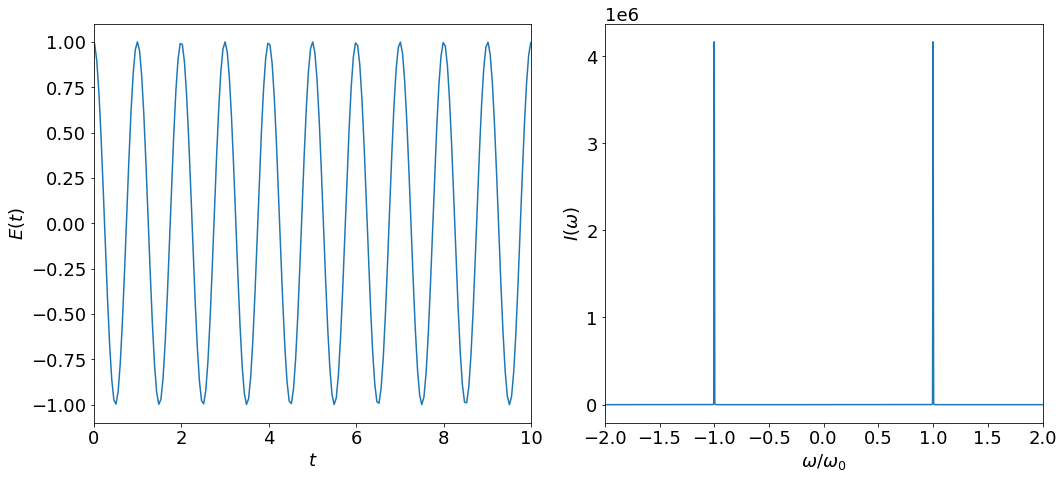

In [36]:
# You do not have to worry about this, unless you want to. 
# I will be super happy to help about this
E_omega = fft.fft(E)
freq = np.fft.fftfreq(t.shape[-1]) # these are in units of pixels, we want to convert it to units of time 
freq = np.fft.fftshift(freq)
E_omega = np.fft.fftshift(E_omega)
freq /= (t[1]-t[0])/2/np.pi



plt.figure(figsize=[15,7])
plt.subplot(121)
plt.plot(t,E)
plt.xlabel("$t$")
plt.ylabel("$E(t)$")
plt.xlim([0,10])
plt.subplot(122)
plt.plot(freq/omega_0, np.abs(E_omega)**2.0)
#plt.plot(freq, E_omega.imag)
plt.xlabel("$\omega/ \omega_0$")
plt.ylabel("$I(\omega)$")
plt.xlim([-2,2])
freq.shape
plt.tight_layout()

#### Do you have any ideas why we got two delta functions and not one? What would I have to input to get just one?

Let's now do some other functions, how about a top-hat? 

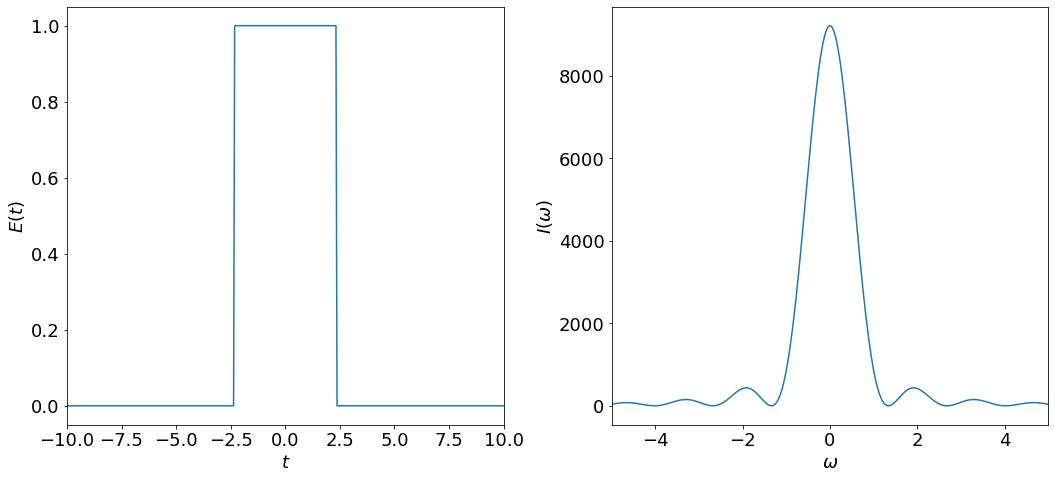

In [37]:
# Top-hat function:
E[:] = 1.0
E[:2000] = 0.0
E[-2000:] = 0.0

E_omega = fft.fft(E)
freq = np.fft.fftfreq(t.shape[-1]) # these are in units of pixels, we want to convert it to units of time 
freq = np.fft.fftshift(freq)
E_omega = np.fft.fftshift(E_omega)
freq /= (t[1]-t[0])/2/np.pi

plt.figure(figsize=[15,7])
plt.subplot(121)
plt.plot(t,E)
plt.xlabel("$t$")
plt.ylabel("$E(t)$")
plt.xlim([-10,10])
plt.subplot(122)
plt.plot(freq, np.abs(E_omega)**2.0)
#plt.plot(freq, E_omega.imag)
plt.ylabel("$I(\omega)$")
plt.xlabel("$\omega$")
plt.xlim([-5,5])
plt.tight_layout()

What if I made narrower top-hat? What would happen? 

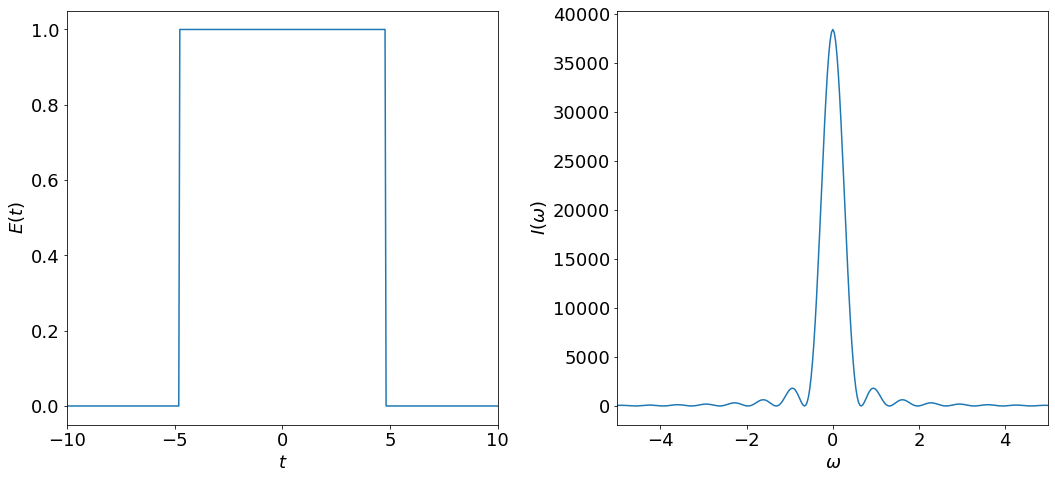

In [38]:
# Top-hat function:
E[:] = 1.0
E[:1950] = 0.0
E[-1950:] = 0.0

E_omega = fft.fft(E)
freq = np.fft.fftfreq(t.shape[-1]) # these are in units of pixels, we want to convert it to units of time 
freq = np.fft.fftshift(freq)
E_omega = np.fft.fftshift(E_omega)
freq /= (t[1]-t[0])/2/np.pi

plt.figure(figsize=[15,7])
plt.subplot(121)
plt.plot(t,E)
plt.xlabel("$t$")
plt.ylabel("$E(t)$")
plt.xlim([-10,10])
plt.subplot(122)
plt.plot(freq, np.abs(E_omega)**2.0)
#plt.plot(freq, E_omega.imag)
plt.ylabel("$I(\omega)$")
plt.xlabel("$\omega$")
plt.xlim([-5,5])
plt.tight_layout()

### Interesting! 

Try to extrapolate what happens when the top-hat function is infinitely wide, what about when it shrinks to a delta function? (5-6 mins)

Try to convince yourself using some analytical formulas (we did something like this in the class last time):

$ E(t) = 1 $ for $ -T/2<t<T/2$, and $E(t) = 0$ otherwise. 

What is the Fourier transform of this? (analytical solution)

$$F(\omega) = \int_{-\infty} ^{\infty} E(t) e^{-i\omega t} dt $$

Well, this is: 

$$F(\omega) = \int_{-T/2} ^{T/2} e^{-i\omega t} dt $$

Say that $-i \omega t = x$, $dt = \frac{dx}{-i\omega}$

Then we get: 

$$F(\omega) = \frac{1}{-i\omega}\int_{-T/2\times -i \omega} ^{T/2 \times -i \omega} e^x dx $$

which is: 

$$F(\omega) = \frac{T/2}{i \omega T/2}\int_{-i \omega T/2} ^{i \omega T/2} e^x dx $$

$$F(\omega) = \frac{T/2}{i \omega T/2} (e^{i \omega T/2} - e^{-i \omega T/2}) $$
$$F(\omega) \propto \frac{\sin(\omega T/2)}{\omega T/2} = sinc(\omega T/2) $$

Now, let's try and agree that a wavepacket is a product of a top-hat function, and, say a cosine. What would FT of that be?

(4096,)

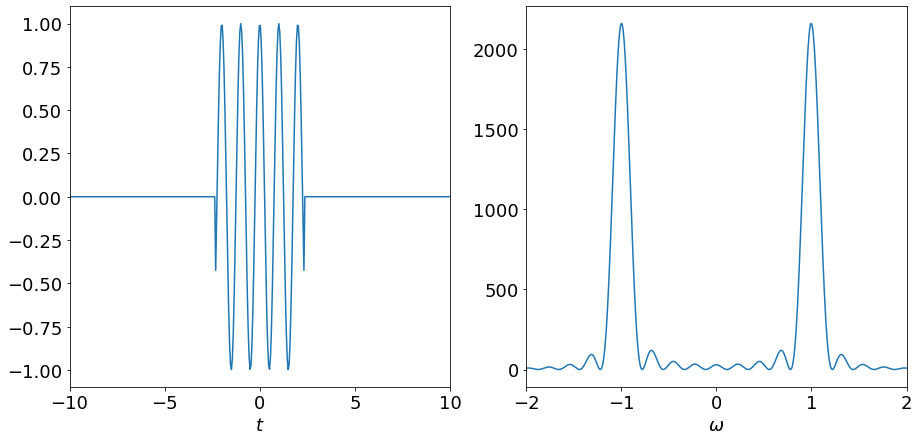

In [39]:
T = 1.0
omega0 = 2*np.pi/T
E = np.cos(omega0 * t)
E[:2000] = 0.0
E[-2000:] = 0.0
E_omega = fft.fft(E)
freq = np.fft.fftfreq(t.shape[-1])
freq = np.fft.fftshift(freq)
E_omega = np.fft.fftshift(E_omega)
freq /= (t[1]-t[0])/2/np.pi
plt.figure(figsize=[15,7])
plt.subplot(121)
plt.plot(t,E)
plt.xlabel("$t$")
plt.xlim([-10,10])
plt.subplot(122)
plt.plot(freq/omega0, np.abs(E_omega)**2.0)
#plt.plot(freq, E_omega.imag)
plt.xlabel("$\omega$")
plt.xlim([-2,2])
freq.shape

Interesting! So, basically, we know now that the fourier transform of a wavepackeet is sinc function. More long the packet, narrower the function:

(4096,)

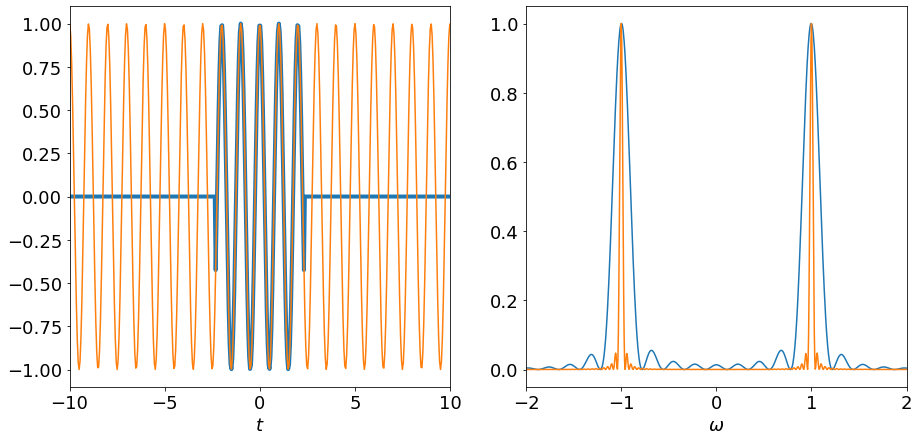

In [40]:
T = 1.0
omega0 = 2*np.pi/T
E_full = np.cos(omega0 * t)
E1 = np.copy(E_full)
E2 = np.copy(E_full)
E1[:2000] = 0.0
E1[-2000:] = 0.0
E2[:1800] = 0.0
E2[-1800:] = 0.0

E_omega1 = fft.fft(E1)
E_omega2 = fft.fft(E2)
freq = np.fft.fftfreq(t.shape[-1])
freq = np.fft.fftshift(freq)
E_omega1 = np.fft.fftshift(E_omega1)
E_omega2 = fft.fft(E2)
E_omega2 = np.fft.fftshift(E_omega2)

I_omega1 = np.abs(E_omega1)**2.0
I_omega2 = np.abs(E_omega2)**2.0

freq /= (t[1]-t[0])/2/np.pi
plt.figure(figsize=[15,7])
plt.subplot(121)
plt.plot(t,E1,linewidth=4)
plt.plot(t,E2)
plt.xlabel("$t$")
plt.xlim([-10,10])
plt.subplot(122)
plt.plot(freq/omega0, I_omega1/np.max(I_omega1))
plt.plot(freq/omega0, I_omega2/np.max(I_omega2))
#plt.plot(freq, E_omega.imag)
plt.xlabel("$\omega$")
plt.xlim([-2,2])
freq.shape